In [1]:
# 加载功能模块
from datetime import datetime

from vnpy.trader.constant import Interval

from elite_optionstrategy import BacktestingEngine

from bull_bear_strategy import BullBearStrategy

In [2]:
# 创建回测引擎
engine = BacktestingEngine()

engine.set_parameters(
    interval=Interval.MINUTE,
    start=datetime(2021, 1, 1),
    end=datetime(2022, 12, 31),
    rate=0,
    slippage=0.6 + (16 / 100),
)


setting = {
    "fast_window": 10,
    "slow_window": 100,
}
engine.add_strategy(BullBearStrategy, setting)

In [3]:
# 历史数据回放
engine.run_backtesting()

100%|██████████| 729/729 [39:02<00:00,  3.21s/it]


In [4]:
# 计算每日盈亏
engine.calculate_result()

2024-02-23 13:41:01.813185	开始计算逐日盯市盈亏
2024-02-23 13:41:01.818105	逐日盯市盈亏计算完成


trade_count  turnover  commission  slippage  trading_pnl  \
date                                                                   
2021-01-04            2   14020.0         0.0     152.0       1340.0   
2021-01-05            0       0.0         0.0       0.0          0.0   
2021-01-06            0       0.0         0.0       0.0          0.0   
2021-01-07            0       0.0         0.0       0.0          0.0   
2021-01-08            0       0.0         0.0       0.0          0.0   
...                 ...       ...         ...       ...          ...   
2022-12-26            0       0.0         0.0       0.0          0.0   
2022-12-27            0       0.0         0.0       0.0          0.0   
2022-12-28            0       0.0         0.0       0.0          0.0   
2022-12-29            0       0.0         0.0       0.0          0.0   
2022-12-30            0       0.0         0.0       0.0          0.0   

            holding_pnl  total_pnl  net_pnl  
date                                         
2021-01-04          0.0     1340.0   1188.0  
2021-01-05       4240.0     4240.0   4240.0  
2021-01-06       1400.0     1400.0   1400.0  
2021-01-07       2220.0     2220.0   2220.0  
2021-01-08       -200.0     -200.0   -200.0  
...                 ...        ...      ...  
2022-12-26       -320.0     -320.0   -320.0  
2022-12-27       -620.0     -620.0   -620.0  
2022-12-28        440.0      440.0    440.0  
2022-12-29        360.0      360.0    360.0  
2022-12-30       -400.0     -400.0   -400.0  

[485 rows x 8 columns]

In [5]:
# 统计绩效结果
result = engine.calculate_statistics()

2024-02-23 13:41:01.930924	开始计算策略统计指标
2024-02-23 13:41:01.974903	------------------------------
2024-02-23 13:41:01.975981	首个交易日：	2021-01-04 00:00:00
2024-02-23 13:41:01.975981	最后交易日：	2022-12-30 00:00:00
2024-02-23 13:41:01.975981	总交易日：	485
2024-02-23 13:41:01.975981	盈利交易日：	190
2024-02-23 13:41:01.975981	亏损交易日：	192
2024-02-23 13:41:01.975981	起始资金：	1,000,000.00
2024-02-23 13:41:01.975981	结束资金：	1,022,780.00
2024-02-23 13:41:01.975981	总收益率：	2.28%
2024-02-23 13:41:01.975981	年化收益：	1.13%
2024-02-23 13:41:01.975981	最大回撤: 	-31,400.00
2024-02-23 13:41:01.975981	最大回撤%: 	-3.03%
2024-02-23 13:41:01.975981	总盈亏：	22,780.00
2024-02-23 13:41:01.975981	总手续费：	0.00
2024-02-23 13:41:01.975981	总滑点：	15,200.00
2024-02-23 13:41:01.975981	总成交金额：	964,700.00
2024-02-23 13:41:01.975981	总成交笔数：	200
2024-02-23 13:41:01.975981	日均盈亏：	46.97
2024-02-23 13:41:01.975981	日均手续费：	0.00
2024-02-23 13:41:01.975981	日均滑点：	31.34
2024-02-23 13:41:01.975981	日均成交金额：	1,989.07
2024-02-23 13:41:01.975981	日均成交笔数：	0.41237113402061853
2024-

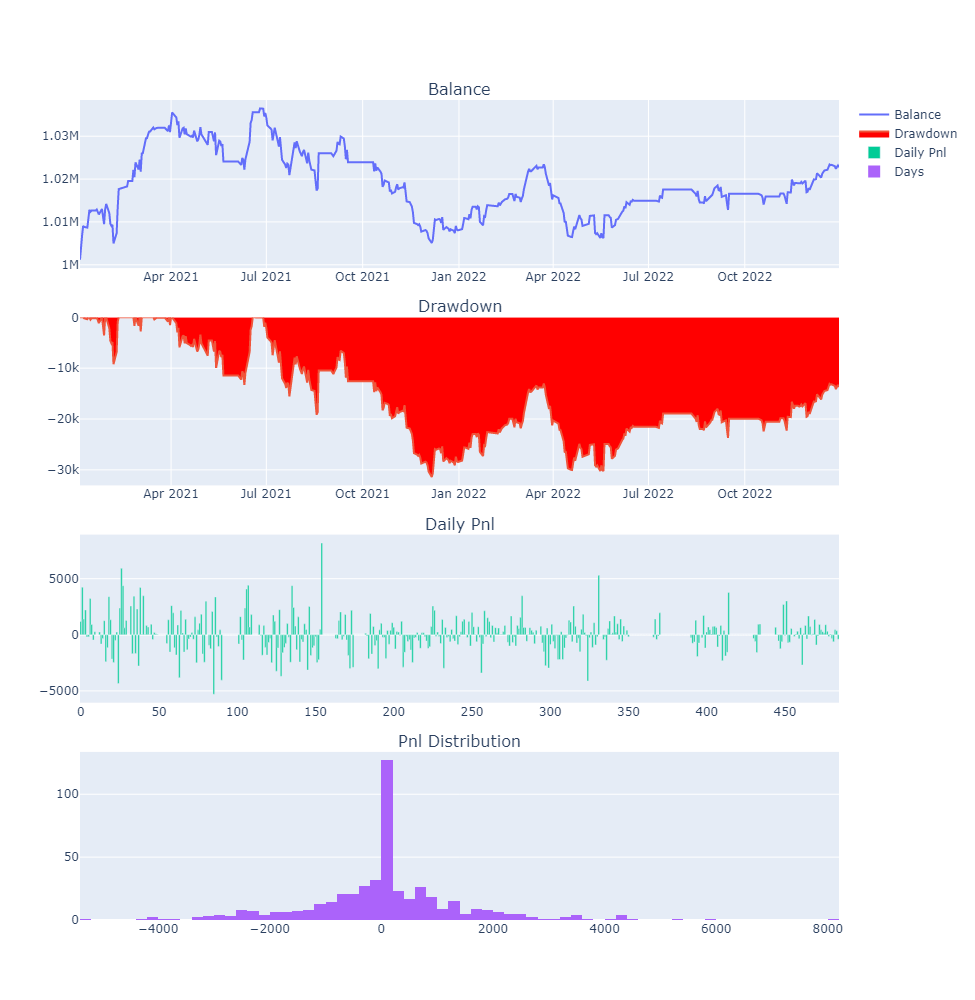

In [6]:
# 显示资金图表
engine.show_chart()

In [7]:
# 打印逐笔成交
for trade in engine.all_trades.values():
    print(trade.datetime, trade.vt_symbol, trade.direction.value, trade.offset.value, trade.volume, "@", trade.price)

2021-01-04 09:31:00+08:00 IO2101-C-5400.CFFEX 空 开 1 @ 34.4
2021-01-04 09:31:00+08:00 IO2101-C-5200.CFFEX 多 开 1 @ 105.8
2021-01-20 14:30:00+08:00 IO2102-P-5500.CFFEX 多 开 1 @ 149.0
2021-01-20 14:30:00+08:00 IO2102-P-5300.CFFEX 空 开 1 @ 65.8
2021-01-21 10:00:00+08:00 IO2102-C-5500.CFFEX 多 开 1 @ 149.8
2021-01-21 10:00:00+08:00 IO2102-P-5500.CFFEX 空 平 1 @ 130.8
2021-01-21 10:00:00+08:00 IO2102-P-5300.CFFEX 多 平 1 @ 56.6
2021-01-21 10:00:00+08:00 IO2102-C-5700.CFFEX 空 开 1 @ 71.8
2021-01-27 10:30:00+08:00 IO2102-C-5500.CFFEX 空 平 1 @ 120.2
2021-01-27 10:30:00+08:00 IO2102-P-5500.CFFEX 多 开 1 @ 127.4
2021-01-27 10:30:00+08:00 IO2102-P-5300.CFFEX 空 开 1 @ 47.8
2021-01-27 10:30:00+08:00 IO2102-C-5700.CFFEX 多 平 1 @ 51.6
2021-02-05 14:00:00+08:00 IO2102-C-5500.CFFEX 多 开 1 @ 98.0
2021-02-05 14:00:00+08:00 IO2102-P-5500.CFFEX 空 平 1 @ 75.4
2021-02-05 14:00:00+08:00 IO2102-P-5300.CFFEX 多 平 1 @ 22.6
2021-02-05 14:00:00+08:00 IO2102-C-5700.CFFEX 空 开 1 @ 23.6
2021-02-24 11:00:00+08:00 IO2103-P-5500.CFFEX 多 开 